In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


summary_info_df = pd.read_csv("./Resources/summary_stats.csv")

regression_df = summary_info_df.dropna()
workable_df = summary_info_df
workable_df

,City,PM2.5 (% change),O3 (% change)
0,Wuhan,-39.0096,46.8958
1,New Delhi,-33.6262,NaN
2,Shanghai,-24.5329,0.9765
3,Manhattan,-22.0286,-0.6978
4,Beijing,-16.2871,10.2483
5,Los Angeles,-7.8955,-10.9295
6,Houston,1.1844,-16.7200
7,Jacksonville,15.8448,-3.2526


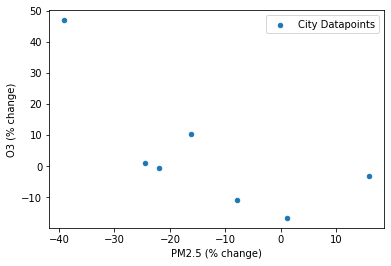

In [12]:
regr_plot, regr_axes = plt.subplots()

scatter_axes = regression_df.plot(kind="scatter", x="PM2.5 (% change)", y="O3 (% change)", ax=regr_axes)
scatter_axes.legend(["City Datapoints"])

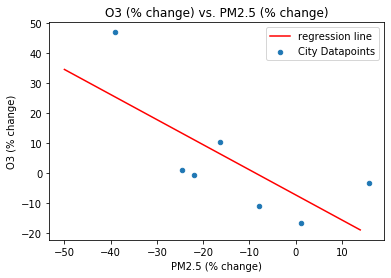

In [13]:
x_values = np.array([a for a in range(-50, 15)])
(slope, intercept, r, _, _) = stats.linregress(regression_df["PM2.5 (% change)"], regression_df["O3 (% change)"])
y_values = slope*x_values+intercept

#put into dataframe
linear_regression_df = pd.DataFrame({"x":x_values, "y":y_values})

#plot line on same graph
lin_reg_line = linear_regression_df.plot(x="x", y="y", style="r", ax=regr_axes)
regr_axes.set_xlabel("PM2.5 (% change)")
regr_axes.legend(["regression line", "City Datapoints"])
regr_axes.set_title("O3 (% change) vs. PM2.5 (% change)")
# scatter_plot.plot(x_values, y_values)
regr_plot

In [28]:
print("The r-squared value for this plot is: {:.2f}".format(r))
num_data_points = len(workable_df)
print(slope)
print(f"Note that we have {num_data_points} data points. Two data points are necessary to make a line, which always has a r-value of" +
      f" 1, so having {num_data_points} data points might show an artificially high r-value or trend that changes or disappears with more data")

The r-squared value for this plot is: -0.72
-0.8357462739807888
Note that we have 8 data points. Two data points are necessary to make a line, which always has a r-value of 1, so having 8 data points might show an artificially high r-value or trend that changes or disappears with more data


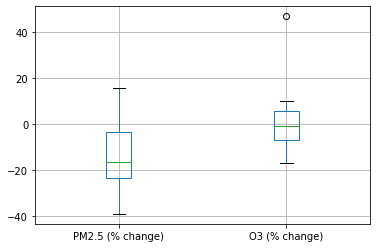

In [15]:
#create boxplot to look for outliers in the data used for the linear regression to find a correlation between PM2.5 
#pollution change and O3 pollution change
regression_df.boxplot(column=list(workable_df.columns[1:3]))

#boxplot shows that the Ozone percent change for Wuhan is an outlier - see how it looks with more data, maybe drop/ignore?

In [20]:
#create a stacked bar plot for the pm2.5 reduction depiction
workable_df["Orig PM2.5"] = 100
workable_df["Final PM2.5"] = workable_df["Orig PM2.5"] + workable_df["Orig PM2.5"]*(workable_df["PM2.5 (% change)"]/100)
workable_df

,City,PM2.5 (% change),O3 (% change),Orig PM2.5,Final PM2.5
0,Wuhan,-39.0096,46.8958,100,60.9904
1,New Delhi,-33.6262,NaN,100,66.3738
2,Shanghai,-24.5329,0.9765,100,75.4671
3,Manhattan,-22.0286,-0.6978,100,77.9714
4,Beijing,-16.2871,10.2483,100,83.7129
5,Los Angeles,-7.8955,-10.9295,100,92.1045
6,Houston,1.1844,-16.7200,100,101.1844
7,Jacksonville,15.8448,-3.2526,100,115.8448


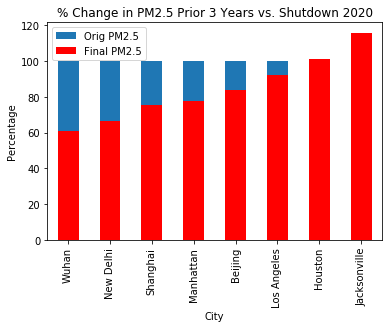

In [27]:
bar_plot, bar_axes = plt.subplots()

#plot original PM2.5 values as baseline bars
workable_df.plot(kind="bar", x="City", y="Orig PM2.5", ax=bar_axes)
bar_axes.set_ylabel("Percentage")
bar_axes.set_title("% Change in PM2.5 Prior 3 Years vs. Shutdown 2020")

#plot PM2.5 values during shutdown as overlaid bars
workable_df.plot(kind="bar", x="City", y="Final PM2.5", color="r", ax=bar_axes)
